# REGRESSIONS
Some regressions we can create using the data. 
## TODO:
* Sanitize inputs (e.g. remove Pro Bowl and All-Pro designation symbols)
    * Sanitize inputs by ignoring non-qualifiers (e.g. receivers who have <20 recs)
* Split data into training & testing

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
# Get CSVs
advPassAir = []
advPassAccuracy = []
passing = []
rec = []
advRec = []

years = [18, 19, 20, 21, 22, 23]
for x in years:
    advPassAir.append(pd.read_csv('Data/passing/advPassAir' + str(x) + '.csv'))
    advPassAccuracy.append(pd.read_csv('Data/passing/advPassAccuracy' + str(x) + '.csv'))
    passing.append(pd.read_csv('Data/passing/pass' + str(x) + '.csv'))
    rec.append(pd.read_csv('Data/receiving/rec' + str(x) + '.csv'))
    advRec.append(pd.read_csv('Data/receiving/advRec' + str(x) + '.csv'))

print(advPassAir[0].head())
print(advPassAccuracy[0].head())
print(advRec[0].head())

   Unnamed: 0  Rk              Player   Tm  Age Pos   G  GS  Cmp  Att   Yds  \
0           0   1  Ben Roethlisberger  PIT   36  QB  16  16  452  675  5129   
1           1   2   Patrick Mahomes*+  KAN   23  QB  16  16  383  580  5097   
2           2   3           Matt Ryan  ATL   33  QB  16  16  422  608  4924   
3           3   4         Jared Goff*  LAR   24  QB  16  16  364  561  4688   
4           4   5        Andrew Luck*  IND   29  QB  16  16  430  639  4593   

    IAY  IAY/PA   CAY  CAY/Cmp  CAY/PA   YAC  YAC/Cmp  
0  5254     7.8  2327      5.1     3.4  2802      6.2  
1  5260     9.1  2489      6.5     4.3  2608      6.8  
2  5210     8.6  2791      6.6     4.6  2133      5.1  
3  4865     8.7  2562      7.0     4.6  2126      5.8  
4  4771     7.5  2621      6.1     4.1  1972      4.6  
   Unnamed: 0  Rk              Player   Tm  Age Pos   G  GS  Cmp  Att   Yds  \
0           0   1  Ben Roethlisberger  PIT   36  QB  16  16  452  675  5129   
1           1   2   Patrick Mah

   Unnamed: 0  Rk              Player   Tm  Age Pos   G  GS  Cmp  Att  ...  \
0           0   1  Ben Roethlisberger  PIT   36  QB  16  16  452  675  ...   
1           1   2   Patrick Mahomes*+  KAN   23  QB  16  16  383  580  ...   
2           2   3           Matt Ryan  ATL   33  QB  16  16  422  608  ...   
3           3   4         Jared Goff*  LAR   24  QB  16  16  364  561  ...   
4           4   5        Andrew Luck*  IND   29  QB  16  16  430  639  ...   

   Spikes  Drops  Drop%  BadTh   Bad%  Bats OnTgt  OnTgt%  BadThNum DropNum  
0       3     24   3.6%    122  18.3%   NaN   NaN     NaN      18.3     3.6  
1       1     28   5.0%     95  17.1%   NaN   NaN     NaN      17.1     5.0  
2       1     36   6.1%     79  13.4%   NaN   NaN     NaN      13.4     6.1  
3       2     13   2.5%     93  17.5%   NaN   NaN     NaN      17.5     2.5  
4       2     37   5.9%     88  14.0%   NaN   NaN     NaN      14.0     5.9  

[5 rows x 22 columns]
0      18.3%
1      17.1%
2      13.4%
3

/var/folders/k4/r531st_n1_9gf7_lf037zq340000gn/T/ipykernel_54616/1953732150.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['BadThNum'] = merged_df['Bad%'].str.strip('%').astype(float)
/var/folders/k4/r531st_n1_9gf7_lf037zq340000gn/T/ipykernel_54616/1953732150.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['DropNum'] = merged_df['Drop%'].str.strip('%').astype(float)


ValueError: x and y must have same first dimension, but have shapes (264, 1) and (53,)

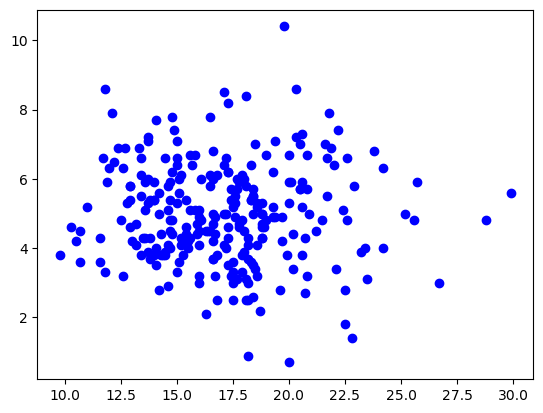

In [37]:
# Create linear regression between BadTh% (percent of throws that are "bad") and Drop%

# NOTE: Turns out there's a Drop% for WRs and QBs, for now I'm evaluating the Drop% of QBs based 
# on QB's Drop% since the shapes of the two features differ.

# Combine passing data into one dataframe
combined_X = pd.DataFrame()

for x in advPassAccuracy:
    combined_X = pd.concat([combined_X , x], ignore_index=True)

# Remove all non-qualifiers (i.e. passers with <100 attempts)
merged_df = combined_X[combined_X['Att'] >= 100]
# print(combined_X)

# Convert percentage values into numeric
merged_df['BadThNum'] = merged_df['Bad%'].str.strip('%').astype(float)
merged_df['DropNum'] = merged_df['Drop%'].str.strip('%').astype(float) 
print(merged_df.head())

# Select features
print(merged_df['Bad%'])
X = merged_df[['BadThNum']]
y = merged_df['DropNum']


# Randomly split data into testing & training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the original data and the linear regression line
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Linear regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

   Unnamed: 0  Rk_x            Player_x   Tm  Age_x Pos_x  G_x  GS_x  Cmp  \
0           0     1  Ben Roethlisberger  PIT     36    QB   16    16  452   
1           0     1  Ben Roethlisberger  PIT     36    QB   16    16  452   
2           0     1  Ben Roethlisberger  PIT     36    QB   16    16  452   
3           0     1  Ben Roethlisberger  PIT     36    QB   16    16  452   
4           0     1  Ben Roethlisberger  PIT     36    QB   16    16  452   

   Att  ...  YAC/R  ADOT  BrkTkl  Rec/Br Drop  Drop%_y   Int    Rat  \
0  675  ...    5.8   8.8       7    15.9    6      3.6   4.0   97.6   
1  675  ...    4.7  11.3       5    20.8    3      1.8  11.0   88.3   
2  675  ...   10.0  -0.3       5    11.0    4      5.6   0.0  100.5   
3  675  ...    7.7   5.3      10     5.0    4      5.6   1.0  108.0   
4  675  ...    3.8   3.4       0     NaN    2      4.5   0.0   98.2   

   Player-additional BadThNum  
0           SmitJu00     18.3  
1           BrowAn04     18.3  
2           Co

ValueError: x and y must have same first dimension, but have shapes (8432, 1) and (1687,)

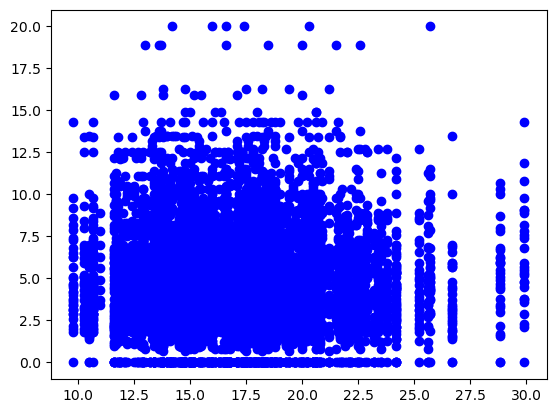

In [40]:
# Create linear regression between BadTh% (percent of throws that are "bad") and Drop%

# NOTE: Turns out there's a Drop% for WRs and QBs, for now I'm evaluating the Drop% of QBs based 
# on receiver's Drop% but I could just evaluate the Drop% for the QBs

# Combine passing data into one dataframe
combined_X = pd.DataFrame()

for x in advPassAccuracy:
    combined_X = pd.concat([combined_X , x], ignore_index=True)

# Remove all non-qualifiers (i.e. passers with <100 attempts)
combined_X = combined_X[combined_X['Att'] >= 100]
# print(combined_X)

# Combine receiving data into one dataframe
combined_Y = pd.DataFrame()

for y in advRec:
    combined_Y = pd.concat([combined_Y , y], ignore_index=True)

# Remove all non-qualifiers (i.e. players with <25 receptions)
combined_Y = combined_Y[combined_Y['Rec'] >= 25]
# print(combined_Y)

# Merge data into one big dataframe
merged_df = pd.merge(combined_X, combined_Y, on='Tm')

# Convert percentage values into numeric
merged_df['BadThNum'] = merged_df['Bad%'].str.strip('%').astype(float)
# merged_df['DropNum'] = merged_df['Drop%_y'].str.strip('%').astype(float) Why is this already numeric?

print(merged_df.head())
# Select features
print(merged_df['Bad%'])
X = merged_df[['BadThNum']]
y = merged_df['Drop%_y']


# Randomly split data into testing & training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the original data and the linear regression line
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Linear regression')
plt.xlabel('QBs Bad Throw%')
plt.ylabel('Receivers Drop%')
plt.title('Linear Regression Model')
plt.legend()
plt.show()